# Import required libraries

In [2]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
%matplotlib inline

#Device configuration
device=torch.device('cpu')
if torch.cuda.is_available():
    device=torch.device('cuda')

# Convert vector to image

In [3]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

# Preprocessing

In [4]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
batch_size = 256

# Load dataset

In [6]:
dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define model architecture and reconstruction loss

In [7]:
d = 500  

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, d), nn.Tanh(),)
        self.decoder = nn.Sequential(nn.Linear(d, 28 * 28), nn.Tanh(),)
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Optimiser

In [8]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train denoising autoencoder 

In [9]:
num_epochs = 20
do = nn.Dropout()  
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        noise = do(torch.ones(img.shape)).to(device)
        img_bad = (img * noise).to(device)  
        #Forward pass
        output = model(img_bad) 
        loss = criterion(output, img.data)
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')

epoch [1/20], loss:0.0707
epoch [2/20], loss:0.0580
epoch [3/20], loss:0.0544
epoch [4/20], loss:0.0500
epoch [5/20], loss:0.0505
epoch [6/20], loss:0.0493
epoch [7/20], loss:0.0485
epoch [8/20], loss:0.0488
epoch [9/20], loss:0.0436
epoch [10/20], loss:0.0428
epoch [11/20], loss:0.0441
epoch [12/20], loss:0.0463
epoch [13/20], loss:0.0435
epoch [14/20], loss:0.0410
epoch [15/20], loss:0.0434
epoch [16/20], loss:0.0421
epoch [17/20], loss:0.0396
epoch [18/20], loss:0.0422
epoch [19/20], loss:0.0403
epoch [20/20], loss:0.0395


# Displaying Generated Images

In [14]:
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

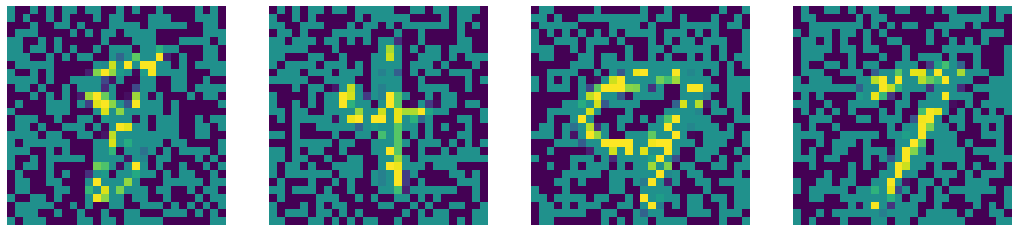

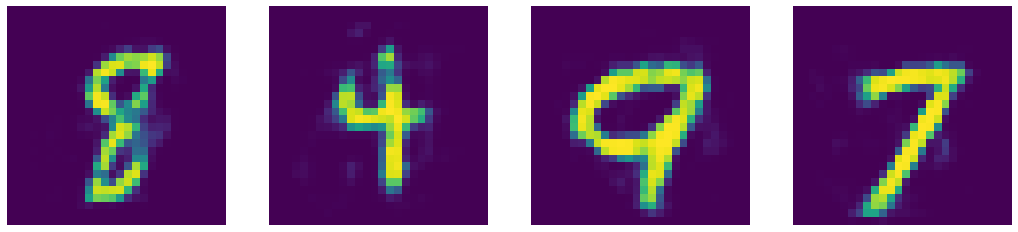

In [17]:
display_images(img_bad, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

# Standard autoencoder 

epoch [1/20], loss:0.2117
epoch [2/20], loss:0.1511
epoch [3/20], loss:0.1221
epoch [4/20], loss:0.1042
epoch [5/20], loss:0.0986
epoch [6/20], loss:0.0877
epoch [7/20], loss:0.0848
epoch [8/20], loss:0.0779
epoch [9/20], loss:0.0711
epoch [10/20], loss:0.0701
epoch [11/20], loss:0.0739
epoch [12/20], loss:0.0680
epoch [13/20], loss:0.0640
epoch [14/20], loss:0.0638
epoch [15/20], loss:0.0649
epoch [16/20], loss:0.0617
epoch [17/20], loss:0.0585
epoch [18/20], loss:0.0556
epoch [19/20], loss:0.0532
epoch [20/20], loss:0.0527


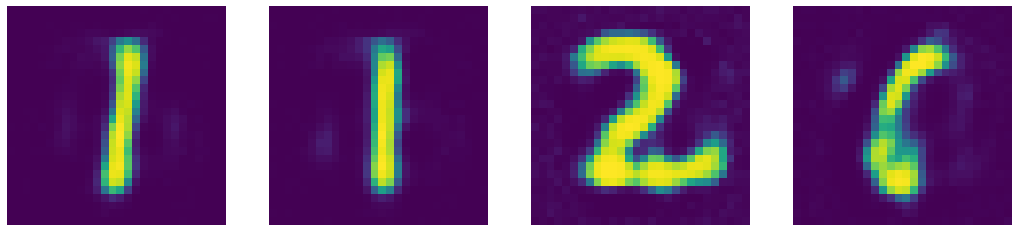

In [18]:
d = 30  

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, d), nn.Tanh(),)
        self.decoder = nn.Sequential(nn.Linear(d, 28 * 28), nn.Tanh(),)
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 20
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        #Forward pass
        output = model(img)  
        loss = criterion(output, img.data)
        #Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    
display_images(None, output)  